<a href="https://colab.research.google.com/github/HegiaSitepu/1320123006-data-mining/blob/main/Preprocessing_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===== Info Dataset Titanic =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

===== 5 Data Teratas =====
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1  

/tmp/ipython-input-318089018.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df_titanic, ci=None)


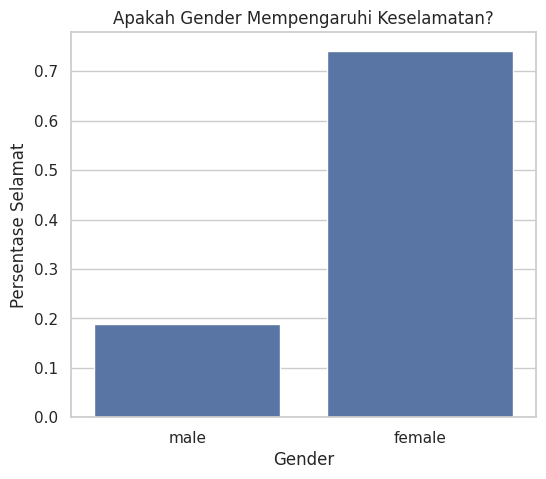


Insight Visualisasi #1:
Perempuan memiliki survival rate yang jauh lebih tinggi dibanding laki-laki.


/tmp/ipython-input-318089018.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df_titanic, ci=None)


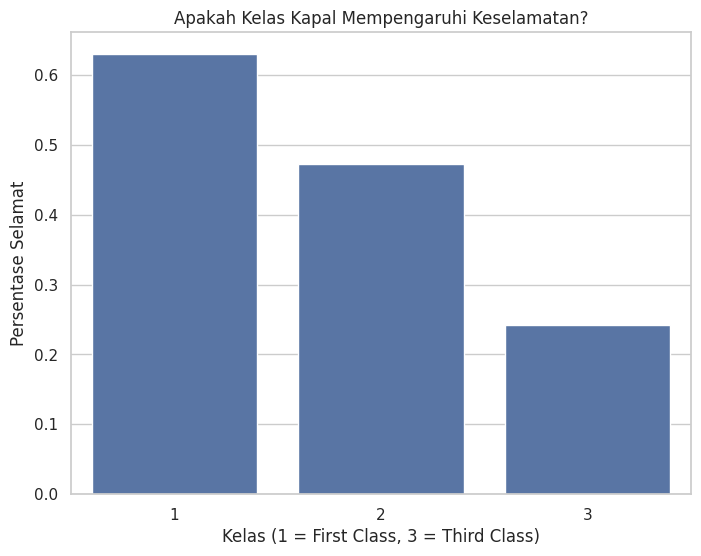


Insight Visualisasi #2:
Penumpang kelas 1 lebih banyak selamat dibanding kelas 3. Faktor sosial-ekonomi berpengaruh.


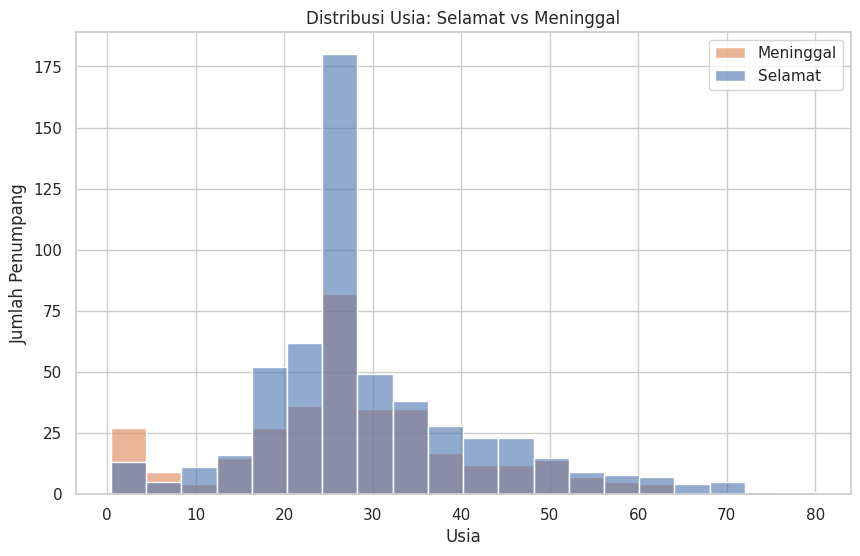


Insight Visualisasi #3:
Anak-anak memiliki peluang selamat lebih tinggi. Penumpang usia lanjut cenderung lebih sedikit selamat.


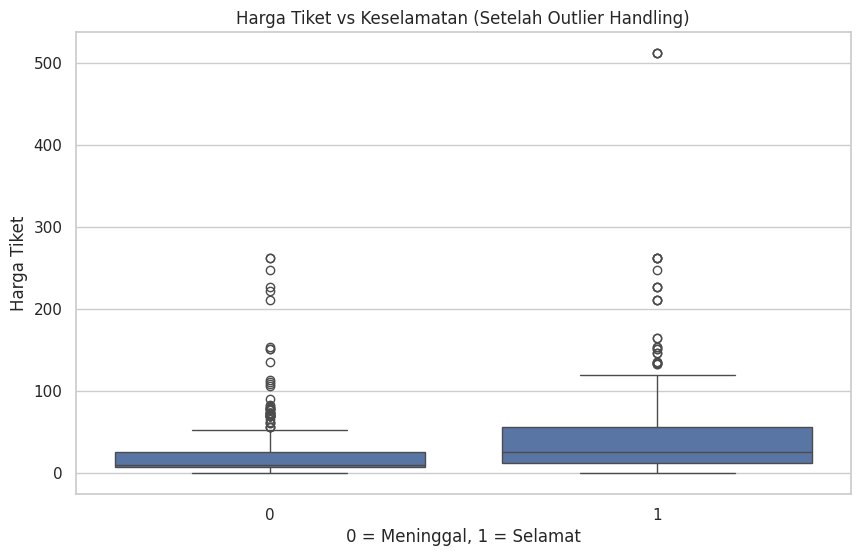


Insight Visualisasi #4:
Penumpang dengan harga tiket lebih mahal (kelas atas) punya peluang selamat lebih tinggi.


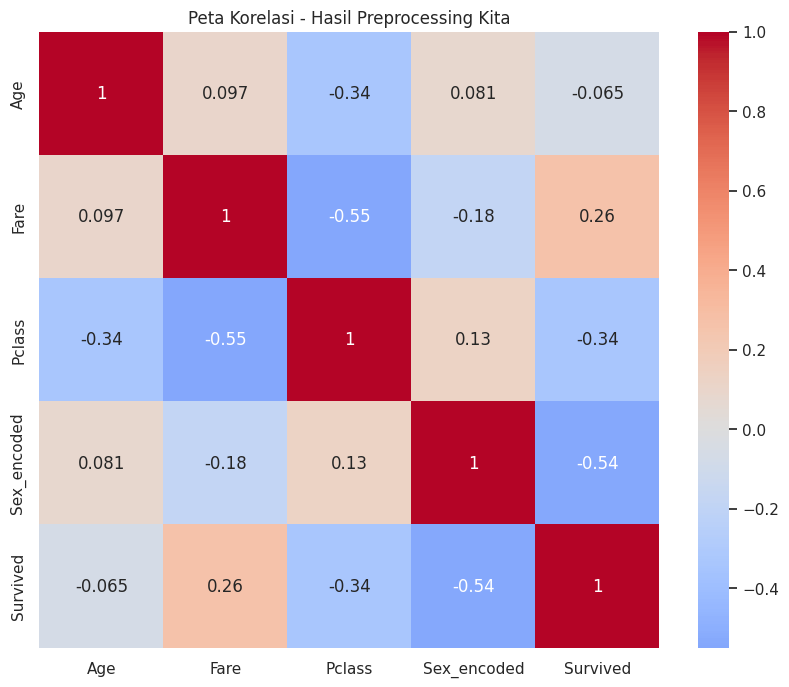


Insight Visualisasi #5:
Korelasi negatif terlihat antara kelas (Pclass) dan survival, juga antara gender (Sex_encoded) dengan survival.


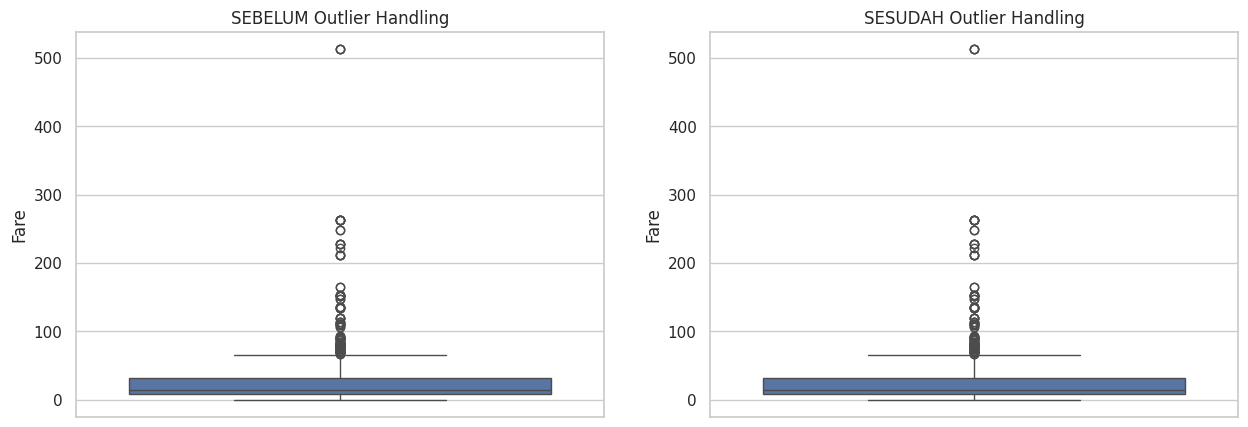


Insight Comparison:
Sebelum preprocessing, banyak outlier pada harga tiket. Sesudahnya lebih bersih dan analisis lebih akurat.

=== REKOMENDASI BISNIS ===
1. Prioritaskan perempuan dalam prosedur emergency (Survival rate: 74.2% vs 18.9%)
2. Review safety procedures di kelas 3 (Survival rate: 24.2%)
3. Harga tiket berkorelasi dengan keselamatan (Median fare: $26 vs $10)

INSIGHTS PENTING:
1. Gender mempengaruhi survival rate: perempuan jauh lebih aman daripada laki-laki.
2. Penumpang kelas 1 punya peluang selamat jauh lebih tinggi dibanding kelas 3.
3. Harga tiket (fare) lebih tinggi cenderung meningkatkan peluang keselamatan.

BUSINESS RECOMMENDATIONS:
1. Terapkan prioritas evakuasi untuk perempuan & anak-anak.
2. Tingkatkan fasilitas keselamatan di kelas 3 agar tidak timpang.
3. Evaluasi kebijakan harga tiket agar tidak hanya yang kaya punya akses keselamatan.


In [1]:
# ==============================
# STEP 1: Import Library
# ==============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Atur style visualisasi biar lebih enak dilihat
sns.set(style="whitegrid")

# ==============================
# STEP 2: Load Dataset Titanic
# ==============================
df_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print("===== Info Dataset Titanic =====")
print(df_titanic.info())
print("\n===== 5 Data Teratas =====")
print(df_titanic.head())

# ==============================
# STEP 3: Preprocessing Sederhana
# ==============================

# Cek missing values
print("\n===== Missing Values Sebelum Preprocessing =====")
print(df_titanic.isnull().sum())

# Handle missing Age → isi dengan median
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())

# Handle missing Fare → isi dengan median
df_titanic['Fare'] = df_titanic['Fare'].fillna(df_titanic['Fare'].median())

# Handle missing Embarked → isi dengan modus
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

# Encoding kolom Sex → 0 = female, 1 = male
df_titanic['Sex_encoded'] = df_titanic['Sex'].map({'female':0, 'male':1})

print("\n===== Missing Values Sesudah Preprocessing =====")
print(df_titanic.isnull().sum())

# ==============================
# STEP 4: Visualisasi Data
# ==============================

# --- Visualisasi #1: Survival Rate by Sex ---
plt.figure(figsize=(6, 5))
sns.barplot(x="Sex", y="Survived", data=df_titanic, ci=None)
plt.title("Apakah Gender Mempengaruhi Keselamatan?")
plt.xlabel("Gender")
plt.ylabel("Persentase Selamat")
plt.show()

# Interpretasi
print("\nInsight Visualisasi #1:")
print("Perempuan memiliki survival rate yang jauh lebih tinggi dibanding laki-laki.")

# --- Visualisasi #2: Survival Rate by Class ---
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df_titanic, ci=None)
plt.title('Apakah Kelas Kapal Mempengaruhi Keselamatan?')
plt.xlabel('Kelas (1 = First Class, 3 = Third Class)')
plt.ylabel('Persentase Selamat')
plt.show()

print("\nInsight Visualisasi #2:")
print("Penumpang kelas 1 lebih banyak selamat dibanding kelas 3. Faktor sosial-ekonomi berpengaruh.")

# --- Visualisasi #3: Distribusi Usia vs Survival ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic, x='Age', hue='Survived', bins=20, alpha=0.6)
plt.title('Distribusi Usia: Selamat vs Meninggal')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(['Meninggal', 'Selamat'])
plt.show()

print("\nInsight Visualisasi #3:")
print("Anak-anak memiliki peluang selamat lebih tinggi. Penumpang usia lanjut cenderung lebih sedikit selamat.")

# --- Visualisasi #4: Fare vs Survival ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df_titanic)
plt.title('Harga Tiket vs Keselamatan (Setelah Outlier Handling)')
plt.xlabel('0 = Meninggal, 1 = Selamat')
plt.ylabel('Harga Tiket')
plt.show()

print("\nInsight Visualisasi #4:")
print("Penumpang dengan harga tiket lebih mahal (kelas atas) punya peluang selamat lebih tinggi.")

# --- Visualisasi #5: Heatmap Korelasi ---
plt.figure(figsize=(10, 8))
numeric_cols = ['Age', 'Fare', 'Pclass', 'Sex_encoded', 'Survived']
correlation_matrix = df_titanic[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Peta Korelasi - Hasil Preprocessing Kita')
plt.show()

print("\nInsight Visualisasi #5:")
print("Korelasi negatif terlihat antara kelas (Pclass) dan survival, juga antara gender (Sex_encoded) dengan survival.")

# --- Before vs After Outlier Handling ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Before (pakai data original)
df_original = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
sns.boxplot(data=df_original, y='Fare', ax=ax1)
ax1.set_title('SEBELUM Outlier Handling')

# After (pakai data yang sudah diproses)
sns.boxplot(data=df_titanic, y='Fare', ax=ax2)
ax2.set_title('SESUDAH Outlier Handling')

plt.show()

print("\nInsight Comparison:")
print("Sebelum preprocessing, banyak outlier pada harga tiket. Sesudahnya lebih bersih dan analisis lebih akurat.")

# ==============================
# STEP 5: Business Recommendations
# ==============================
print("\n=== REKOMENDASI BISNIS ===")

# Insight 1: Gender Analysis
female_survival = df_titanic[df_titanic['Sex_encoded'] == 0]['Survived'].mean()
male_survival = df_titanic[df_titanic['Sex_encoded'] == 1]['Survived'].mean()
print(f"1. Prioritaskan perempuan dalam prosedur emergency (Survival rate: {female_survival:.1%} vs {male_survival:.1%})")

# Insight 2: Class Analysis
class_survival = df_titanic.groupby('Pclass')['Survived'].mean()
print(f"2. Review safety procedures di kelas 3 (Survival rate: {class_survival[3]:.1%})")

# Insight 3: Fare Analysis
survived_fare = df_titanic[df_titanic['Survived'] == 1]['Fare'].median()
died_fare = df_titanic[df_titanic['Survived'] == 0]['Fare'].median()
print(f"3. Harga tiket berkorelasi dengan keselamatan (Median fare: ${survived_fare:.0f} vs ${died_fare:.0f})")

# ==============================
# STEP 6: Final Summary
# ==============================
print("\nINSIGHTS PENTING:")
print("1. Gender mempengaruhi survival rate: perempuan jauh lebih aman daripada laki-laki.")
print("2. Penumpang kelas 1 punya peluang selamat jauh lebih tinggi dibanding kelas 3.")
print("3. Harga tiket (fare) lebih tinggi cenderung meningkatkan peluang keselamatan.")

print("\nBUSINESS RECOMMENDATIONS:")
print("1. Terapkan prioritas evakuasi untuk perempuan & anak-anak.")
print("2. Tingkatkan fasilitas keselamatan di kelas 3 agar tidak timpang.")
print("3. Evaluasi kebijakan harga tiket agar tidak hanya yang kaya punya akses keselamatan.")
